## Import Library

In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd

## Read Database

In [20]:
# Membaca data dari Excel
data = pd.read_excel(r"C:\Users\fedba\Downloads\Project Skripsi\data alquran.xlsx",
                    sheet_name="Sheet1")

data = data.iloc[0:100] # Surat Al-Fatihah

# Filter out rows with non-string values in answers
filtered_data = data[data['Terjemah_Ayat'].astype(str).notna()]

## Data Preprocessing

Format Pertanyaan yang dipilih
```python
questions = "Arti Surat "+ filtered_data["Nama_Surat"] + " Ayat Ke- " + filtered_data["Nomor_Ayat"].astype(str)
```

Contoh
```
Arti Surat Al-Fatihah Ayat Ke- 1
```

In [21]:
questions = "Arti Surat "+ filtered_data["Nama_Surat"] + " Ayat Ke- " + filtered_data["Nomor_Ayat"].astype(str)
data["Questions"] = questions

Jawaban diambil khusus kolom Terjemah ayat

In [22]:
answers = filtered_data["Terjemah_Ayat"]
answers = np.array([str(answer) for answer in answers])

In [23]:
data

,Nomor_Juz,Nomor_Surat,Nama_Surat,Arti_Surat,Nomor_Ayat,Terjemah_Ayat,Questions
0,1,1,Al-Fatihah,Pembukaan,1,"Dengan nama Allah Yang Maha Pengasih, Maha Pen...",Arti Surat Al-Fatihah Ayat Ke- 1
1,1,1,Al-Fatihah,Pembukaan,2,"Segala puji bagi Allah, Tuhan seluruh alam,",Arti Surat Al-Fatihah Ayat Ke- 2
2,1,1,Al-Fatihah,Pembukaan,3,"Yang Maha Pengasih, Maha Penyayang,",Arti Surat Al-Fatihah Ayat Ke- 3
3,1,1,Al-Fatihah,Pembukaan,4,Pemilik hari pembalasan.,Arti Surat Al-Fatihah Ayat Ke- 4
4,1,1,Al-Fatihah,Pembukaan,5,Hanya kepada Engkaulah kami menyembah dan hany...,Arti Surat Al-Fatihah Ayat Ke- 5
...,...,...,...,...,...,...,...
95,1,2,Al-Baqarah,Sapi Betina,89,Dan setelah sampai kepada mereka Kitab (Al-Qur...,Arti Surat Al-Baqarah Ayat Ke- 89
96,1,2,Al-Baqarah,Sapi Betina,90,Sangatlah buruk (perbuatan) mereka menjual dir...,Arti Surat Al-Baqarah Ayat Ke- 90
97,1,2,Al-Baqarah,Sapi Betina,91,"Dan apabila dikatakan kepada mereka, â€œBerima...",Arti Surat Al-Baqarah Ayat Ke- 91
98,1,2,Al-Baqarah,Sapi Betina,92,"Dan sungguh, Musa telah datang kepadamu dengan...",Arti Surat Al-Baqarah Ayat Ke- 92


## One Hot Encoding

Mengubah tipe dataset menjadi array unik untuk setiap baris dengan menggunakan teknik One Hot Encoding

In [24]:
# Convert data to one-hot vectors
input_vectors = []
for question in questions:
    input_vector = np.zeros(len(questions))
    input_vector[questions.tolist().index(question)] = 1
    input_vectors.append(input_vector)

answer_vectors = []
for answer in answers:
    answer_vector = np.zeros(len(answers))
    answer_vector[answers.tolist().index(answer)] = 1
    answer_vectors.append(answer_vector)

## Membuat Model Memory Neural Network

In [25]:
# Define the Memory Network model
class MemoryNetwork(tf.keras.Model):
    def __init__(self, input_dim, memory_dim, output_dim):
        super(MemoryNetwork, self).__init__()
        self.input_dim = input_dim
        self.memory_dim = memory_dim
        self.output_dim = output_dim

        # Define layers
        self.dense_input = tf.keras.layers.Dense(memory_dim, activation="tanh")
        self.dense_memory = tf.keras.layers.Dense(memory_dim, activation="tanh")
        self.dense_answer = tf.keras.layers.Dense(output_dim, activation="softmax")

    def call(self, inputs):
        # Build the network using layers
        memory_state = self.dense_memory(self.dense_input(inputs))
        answer_logits = self.dense_answer(memory_state)
        return answer_logits
    
    def get_config(self):
        return {"output_dim": self.output_dim, "name": self.name}

## Training Model

In [26]:
# Train the Memory Network
model = MemoryNetwork(input_dim=len(questions), memory_dim=128, output_dim=len(answers))
num_epochs = 10

# Compile the model (automatically initializes variables)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=['accuracy'])

In [27]:
model.summary()

Model: "memory_network_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Create an empty history list to store training metrics
history = []

num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    for i in range(len(questions)):
        with tf.GradientTape() as tape:
            predictions = model(tf.expand_dims(input_vectors[i], axis=0))
            loss = model.compiled_loss(answer_vectors[i].reshape(1, -1), predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Calculate accuracy (assuming one-hot encoded answers)
        accuracy = tf.keras.metrics.categorical_accuracy(answer_vectors[i].reshape(1, -1), predictions)[0]

        if i % (0.01 * num_epochs) == 0:
            print("Epoch:", epoch + 1, "Step:", i, "Loss:", loss.numpy(), "Accuracy:", accuracy.numpy())

            # Append epoch's loss and accuracy to history
            history.append({'epoch': epoch + 1, 'loss': loss.numpy(), 'accuracy': accuracy.numpy()})

C:\Users\fedba\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py:614: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight)`.
  warnings.warn(


Epoch: 1 Step: 0 Loss: 4.610936 Accuracy: 0.0
Epoch: 2 Step: 0 Loss: 4.067633 Accuracy: 1.0
Epoch: 3 Step: 0 Loss: 3.772623 Accuracy: 1.0
Epoch: 4 Step: 0 Loss: 3.3793173 Accuracy: 1.0
Epoch: 5 Step: 0 Loss: 2.8599758 Accuracy: 1.0
Epoch: 6 Step: 0 Loss: 2.2058015 Accuracy: 1.0
Epoch: 7 Step: 0 Loss: 1.4731718 Accuracy: 1.0
Epoch: 8 Step: 0 Loss: 0.82545924 Accuracy: 1.0
Epoch: 9 Step: 0 Loss: 0.4258688 Accuracy: 1.0
Epoch: 10 Step: 0 Loss: 0.24009548 Accuracy: 1.0


In [29]:
model.save('model.h5')

### Cek Metrik Akurasi, Loss dan Plot History dari keseluruhan Training Data

In [30]:
history = pd.DataFrame(history)
history

,epoch,loss,accuracy
0,1,4.610936,0.0
1,2,4.067633,1.0
2,3,3.772623,1.0
3,4,3.379317,1.0
4,5,2.859976,1.0
5,6,2.205801,1.0
6,7,1.473172,1.0
7,8,0.825459,1.0
8,9,0.425869,1.0
9,10,0.240095,1.0


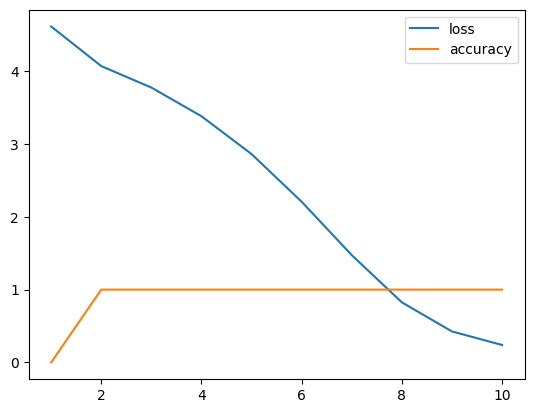

In [31]:
import matplotlib.pyplot as plt
x = history["epoch"]

plt.plot(x,history["loss"],label="loss")
plt.plot(x,history["accuracy"],label="accuracy")
plt.legend()
plt.show()

## Evaluasi Model

In [32]:
#from tensorflow.keras.models import load_model

#model = load_model('model.h5')


In [33]:
# Evaluate the model
predictions = model.predict(
    tf.expand_dims(input_vectors, axis=1)
    )  # Add batch dimension

for i, prediction in enumerate(predictions):
    predicted_answer_index = np.argmax(prediction)
    print("Question:", questions[i])
    print("Predicted Answer:", answers[predicted_answer_index])
    print("Correct Answer:", answers[i])
    print("----------------------")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Question: Arti Surat Al-Fatihah Ayat Ke- 1
Predicted Answer: Dengan nama Allah Yang Maha Pengasih, Maha Penyayang.
Correct Answer: Dengan nama Allah Yang Maha Pengasih, Maha Penyayang.
----------------------
Question: Arti Surat Al-Fatihah Ayat Ke- 2
Predicted Answer: Segala puji bagi Allah, Tuhan seluruh alam,
Correct Answer: Segala puji bagi Allah, Tuhan seluruh alam,
----------------------
Question: Arti Surat Al-Fatihah Ayat Ke- 3
Predicted Answer: Yang Maha Pengasih, Maha Penyayang,
Correct Answer: Yang Maha Pengasih, Maha Penyayang,
----------------------
Question: Arti Surat Al-Fatihah Ayat Ke- 4
Predicted Answer: Pemilik hari pembalasan.
Correct Answer: Pemilik hari pembalasan.
----------------------
Question: Arti Surat Al-Fatihah Ayat Ke- 5
Predicted Answer: Hanya kepada Engkaulah kami menyembah dan hanya kepada Engkaulah kami mohon pertolongan.
Correct Answer: Hanya kepada Engkaulah kami menyembah dan hanya kepada Engkaulah kami mohon pe

## Membuat Prediksi

In [34]:
def predict_single_input(question):
    '''Fungsi untuk Prediksi Input
    '''
    qdx = questions.tolist().index(question)
    question_np = np.zeros(len(questions))
    question_np[qdx] = 1
    question_np = question_np.reshape(1, -1)
    # Ensure known shape
    prediction = model.predict(
        #input_vector
        tf.expand_dims(question_np, axis=1)
    )  # Add batch dimension

    predicted_answer_index = np.argmax(prediction)
    print("predicted_answer_index: ",predicted_answer_index)
    print("Predicted Answer: ", answers[predicted_answer_index])
    print(data.iloc[predicted_answer_index])

In [37]:
question = "Arti Surat Al-Baqarah Ayat Ke- 1"
predict_single_input(question)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
predicted_answer_index:  7
Predicted Answer:  Alif Lam Mim.
Nomor_Juz                                       1
Nomor_Surat                                     2
Nama_Surat                             Al-Baqarah
Arti_Surat                            Sapi Betina
Nomor_Ayat                                      1
Terjemah_Ayat                       Alif Lam Mim.
Questions        Arti Surat Al-Baqarah Ayat Ke- 1
Name: 7, dtype: object
